In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from subprocess import check_output
print(check_output(["ls","all"]).decode("utf8"))

sample_submission.csv
test.csv
train.csv



In [3]:
import tensorflow as tf
import pickle
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [35]:
train_data0 = pd.read_csv("all/train.csv")
print(train_data0.shape)
train_data = np.array(train_data0.iloc[:, 1:785])
train_label = np.array(train_data0.iloc[:,0])
print(train_data.shape)
print(train_label.shape)

(42000, 785)
(42000, 784)
(42000,)


In [23]:
train_label = to_categorical(train_label, num_classes=10)
print(train_label[:10,:])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [26]:
test_data0 = pd.read_csv("all/test.csv")
print(test_data0.shape)

(28000, 784)


In [34]:
test_data = np.array(test_data0)
print(test_data.shape)

(28000, 784)


In [52]:
print(np.array(train_data0.iloc[:,0])[:10])
print('is equivalent to :')
print(train_label[:10])

[1 0 1 4 0 0 7 3 5 3]
is equivalent to :
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   5  60 136 136 147 254 255
 199 111  18   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  25 152 253 253 253 253 253 253 253 253 253 124   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 135 225 244 253 202 200
 181 164 216 253 253 211 151   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  30 149  78   3   0   0   0  20 134 253 253 224   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  28 206 253 253 224   0   0   0   

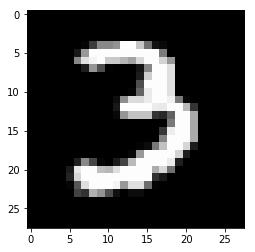

In [36]:
print(train_data[9])
pixels = train_data[9].reshape((28,28))
plt.imshow(pixels, cmap='gray')
plt.show()

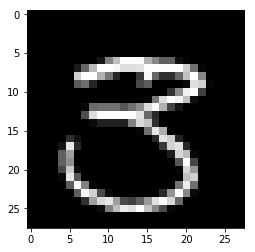

In [33]:
pixels = train_data[7].reshape((28,28))
plt.imshow(pixels, cmap='gray')
plt.show()

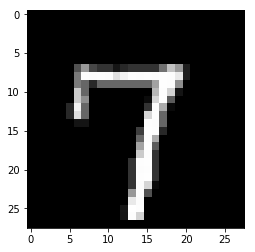

In [55]:
pixels = train_data[6].reshape((28,28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [47]:
learning_rate = 0.00005
epoch = 40
batch_size = 20

n_input = 784
n_classes = 10

X = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

def conv2d(name, x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.elu(x, name=name)

def maxpool2d(name, x, k=2):
    return tf.nn.max_pool(x, ksize=[1,k,k,1], strides=[1,k,k,1], padding = 'SAME')

weights = {
    'W1' : tf.Variable(tf.truncated_normal([5,5,1,32], stddev=0.1)),
    'W2' : tf.Variable(tf.truncated_normal([5,5,32,64], stddev=0.1)),
    'W4' : tf.Variable(tf.truncated_normal([64*7*7,784],stddev=0.1)),
    'Wo' : tf.Variable(tf.truncated_normal([784,n_classes], stddev=0.1))
}
a = tf.Variable(1)
print(a)
print(tf.Variable(tf.truncated_normal([5,5,1,32],stddev=0.1)))

biases = {
    'b1' : tf.Variable(tf.random_normal([32],stddev=0.1)),
    'b2' : tf.Variable(tf.random_normal([64], stddev=0.1)),
    'b4' : tf.Variable(tf.random_normal([784], stddev=0.1)),
    'bo' : tf.Variable(tf.random_normal([n_classes], stddev=0.1))
}

<tf.Variable 'Variable_55:0' shape=() dtype=int32_ref>
<tf.Variable 'Variable_56:0' shape=(5, 5, 1, 32) dtype=float32_ref>


In [57]:
def model(X, weights , biases):
    x = tf.reshape(X, [-1,28,28,1]) #padding
    x = x/255 #normalization
    
    conv1 = tf.nn.elu(conv2d('conv1', x, weights['W1'], biases['b1'])) 
    pool1 = maxpool2d('pool1', conv1, k=2)
    
    conv2 = tf.nn.elu(conv2d('conv2',pool1,weights['W2'],biases['b2']))
    pool2 = maxpool2d('pool2',conv2,k=2)
    
    fc = tf.reshape(pool2, [-1, weights['W4'].get_shape().as_list()[0]])
    fc = tf.add(tf.matmul(fc,weights['W4']), biases['b4'])
    fc = tf.nn.elu(fc)
    
    a = tf.add(tf.matmul(fc, weights['Wo']), biases['bo'])
    return a

In [58]:
pred = model(X, weights, biases)

In [59]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
label = tf.argmax(pred,1)

In [60]:
correct_pred = tf.equal(label, tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [61]:
init = tf.global_variables_initializer()
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
with tf.Session(config=config) as sess:
    sess.run(init)
    for e in range(epoch):
        step = 1
        while step*batch_size <= train_data.shape[0]:
            xs, ys = train_data[(step-1)*batch_size:step*batch_size, :], train_label[(step-1)*batch_size:step*batch_size, :]
            sess.run(optimizer, feed_dict={X:xs, y:ys})
            
            if step % 100 == 0:
                loss, acc = sess.run([cost,accuracy], feed_dict={X:xs, y:ys})
                print("Iter {0}, Minibatch Loss = {1}, Training accuracy = {2}".format(str(step),loss,acc))
                
            step += 1
    print("Optimization Completed")
    test_labels = []
    for i in range(1000):
        xs, ys = test_data[i*28:(i+1)*28, :], test_data[i*28:(i+1)*28, 0:10]
        pred_ = sess.run(label, feed_dict={X:xs, y:ys})
        test_labels.extend(list(pred_))
        
f1 = open('label','wb')
pickle.dump(test_labels, f1)
f1.close()

df = pd.DataFrame({'Label' : test_labels})
df1 = pd.concat([pd.Series(range(1,28001), name='ImageId'), df[['Label']]], axis=1)
df1.to_csv('ConvPool_X2.csv', index=False)
            
            

Iter 100, Minibatch Loss = 2.22756290436, Training accuracy = 0.20000000298
Iter 200, Minibatch Loss = 1.47197127342, Training accuracy = 0.600000023842
Iter 300, Minibatch Loss = 1.22464263439, Training accuracy = 0.600000023842
Iter 400, Minibatch Loss = 1.00303459167, Training accuracy = 0.699999988079
Iter 500, Minibatch Loss = 0.91278553009, Training accuracy = 0.600000023842
Iter 600, Minibatch Loss = 0.953575491905, Training accuracy = 0.600000023842
Iter 700, Minibatch Loss = 0.731966853142, Training accuracy = 0.699999988079
Iter 800, Minibatch Loss = 0.613800227642, Training accuracy = 0.800000011921
Iter 900, Minibatch Loss = 0.385223686695, Training accuracy = 0.899999976158
Iter 1000, Minibatch Loss = 0.489326417446, Training accuracy = 0.899999976158
Iter 1100, Minibatch Loss = 0.983053028584, Training accuracy = 0.699999988079
Iter 1200, Minibatch Loss = 0.922894477844, Training accuracy = 0.699999988079
Iter 1300, Minibatch Loss = 1.16084730625, Training accuracy = 0.60

Iter 2800, Minibatch Loss = 0.181100219488, Training accuracy = 0.800000011921
Iter 2900, Minibatch Loss = 0.0112752299756, Training accuracy = 1.0
Iter 3000, Minibatch Loss = 0.235515743494, Training accuracy = 0.899999976158
Iter 3100, Minibatch Loss = 0.194180324674, Training accuracy = 0.899999976158
Iter 3200, Minibatch Loss = 0.151329085231, Training accuracy = 1.0
Iter 3300, Minibatch Loss = 0.112877011299, Training accuracy = 0.899999976158
Iter 3400, Minibatch Loss = 0.0466692820191, Training accuracy = 1.0
Iter 3500, Minibatch Loss = 0.169158726931, Training accuracy = 0.899999976158
Iter 3600, Minibatch Loss = 0.028292587027, Training accuracy = 1.0
Iter 3700, Minibatch Loss = 0.00818279385567, Training accuracy = 1.0
Iter 3800, Minibatch Loss = 0.12999971211, Training accuracy = 0.899999976158
Iter 3900, Minibatch Loss = 0.0671806558967, Training accuracy = 1.0
Iter 4000, Minibatch Loss = 0.139138251543, Training accuracy = 0.899999976158
Iter 4100, Minibatch Loss = 0.00494

Iter 1700, Minibatch Loss = 0.00287162349559, Training accuracy = 1.0
Iter 1800, Minibatch Loss = 0.00901879929006, Training accuracy = 1.0


KeyboardInterrupt: 